<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>
## 2. Job Salary Prediction
> a) Carge los datos csv de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de pandas. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto? 


Ya que github no permite subir archivos que pesen mas de 100MB fal 

In [58]:
import pandas as pd
df = pd.read_csv("Train_rev1.csv")

df_train = df.iloc[:-10000]
df_val = df.iloc[-10000:]

print(df_train.shape)
print(df_val.shape)
df.head()

(234768, 12)
(10000, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Hay 234768 datos de entrenamiento y 10000 datos de validacion.

>b) Extraiga los datos de cada conjunto con los que trabajará, el input 𝑋, los textos, y el output 𝑦, los salarios.


In [59]:
X_brutotrain = df_train.FullDescription
Y_train = df_train.SalaryNormalized

X_brutoval = df_val.FullDescription
Y_val = df_val.SalaryNormalized

>c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$ . Comente sobre lo realizado.

Se preprocesan los datos dejandolo en un formato estandarizado.<br>
Primero se lematizan las palabras, es decir, se dejan en su raiz mas basica, por ejemplo, jugando y juguemos al ser lematizadas se transforman en "jug".<br>
En segundo lugar, se filtran las palabras vacias "stopwords", como las preposiciones y adjetivos.<br>
Por ultimo, se construye una representacion vectorial del texto, donde cada elemento del vector dice la cantidad de veces que aparece cierta palabra en el texto.

In [60]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

In [61]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text) for text in np.asarray(X_brutotrain)]
texts_val = [word_extractor(text) for text in np.asarray(X_brutoval)]

    

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(texts_train)

X_train = vectorizer.transform(texts_train)
print(X_train.shape)
X_val = vectorizer.transform(texts_val)
print(X_val.shape)


(234768, 177627)
(10000, 177627)


>d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en sklearn. ¿Qué es lo que hace fit_intercept=True? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (mean absolute error) en ambos conjuntos generados en el punto a). Comente lo observado.

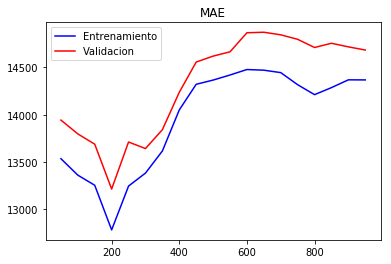

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error
train_size = range(50,1000,50)

model = LR(fit_intercept=True, normalize=False)
error_train=[]
error_val=[]
for i in train_size:
    model.fit(X_train[:i],Y_train[:i]) #measure MAE
    error_train.append(mean_absolute_error(Y_train, model.predict(X_train)))
    error_val.append(mean_absolute_error(Y_val, model.predict(X_val)))
    

plt.plot(train_size,  error_train, '-b', label='Entrenamiento')
plt.plot(train_size,  error_val, '-r', label='Validacion')
plt.title('MAE')
plt.legend()
plt.show()

Se hace una regresion lineal con muestras de distintos tamaños para el conjunto de entrenamiento, entre 50 a 5000. Se aprecia el comportamiento esperado con respecto al conjunto de validacion,  el error de entrenamiento es menor y tienen la misma forma. Por otro lado, el parametro fit_intercept determina si el intercepto de la regresion se calcula (True) o se fija en 0 (False).

> e) Intente mejorar sus resultados en base a la métrica de la competencia (MAE) sobre el conjunto de validación. Comente sobre lo realizado.  

Es importante mencionar que al momento de preprocesar los datos, se hizo sobre el conjunto total de entrenamiento, esto tiene el efecto de aumentar radicalmente la cantidad de caracteristicas de los datos. Por lo tanto se sugiere preprocesar solo sobre el conjunto de entrenamiento y luego construir la regresion.

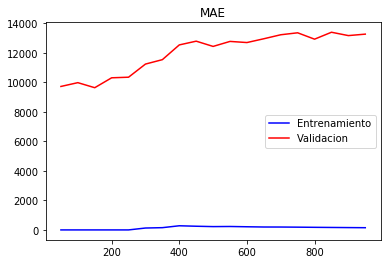

In [90]:
model = LR(fit_intercept=True, normalize=False)

train_size = range(50,1000,50)

error_train=[]
error_val=[]


vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')

for i in train_size:

    texts_train = [word_extractor(text) for text in np.asarray(X_brutotrain)[:i]]
    texts_val = [word_extractor(text) for text in np.asarray(X_brutoval)[:i]]



    vectorizer.fit(texts_train)

    X_train = vectorizer.transform(texts_train)
    X_val = vectorizer.transform(texts_val)


    
    model.fit(X_train,Y_train[:i]) #measure MAE
    error_train.append(mean_absolute_error(Y_train[:i], model.predict(X_train)))
    error_val.append(mean_absolute_error(Y_val[:i], model.predict(X_val)))
    

plt.plot(train_size,  error_train, '-b', label='Entrenamiento')
plt.plot(train_size,  error_val, '-r', label='Validacion')
plt.title('MAE')
plt.legend()
plt.show()

Se aprecia una mejora sustancial en los resultados, sin embargo, hay un overfitting masivo, de todas formas el error de validacion es menor al caso de la pregunta anterior.